# 読売３３３の評価

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filename = 'report_yomiuri333.ods'
df = pd.read_excel(filename, index_col=0)
df.index = pd.to_datetime(df.index)
df.tail(10)

,日経225（終値）,TOPIX（終値）,読売333
Date,,,
2025-05-09,37503.33,2733.49,34978.94
2025-05-12,37644.26,2742.08,35139.44
2025-05-13,38183.26,2772.14,35315.36
2025-05-14,38128.13,2763.29,35115.73
2025-05-15,37755.51,2738.96,34919.99
2025-05-16,37753.72,2740.45,35035.84
2025-05-19,37498.63,2738.39,34968.84
2025-05-20,37529.49,2738.83,34835.92
2025-05-21,37298.98,2732.88,34858.89


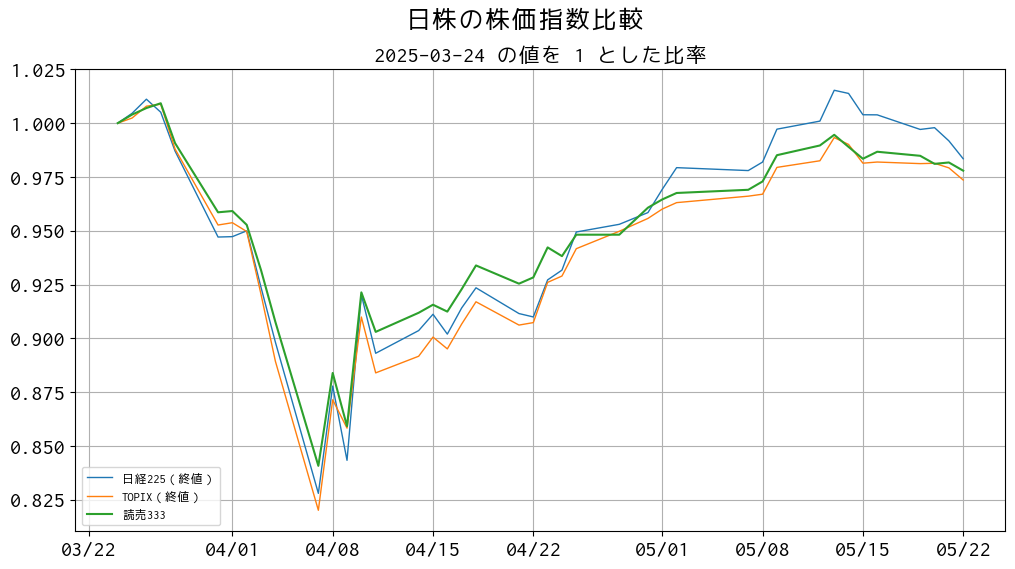

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

for colname in df.columns:
    ser = df[colname] / df[colname].iloc[0]
    if colname == '読売333':
        lw = 1.5
    else:
        lw = 1
    ax.plot(ser, label=colname, linewidth=lw)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

fig.suptitle('日株の株価指数比較')
ax.set_title('2025-03-24 の値を 1 とした比率', fontsize=16)
ax.grid()
ax.legend(loc='best', fontsize=9)

plt.savefig('report_yomiuri333.png' )
plt.show()